# IS 362 - Final Project

## Objective
The objective of this project is to examine the average college graduation and loan default rates in each state in the U.S. from 2013 to 2023 by analyzing data from the U.S. Department of Education. 

## Load and Clean Data
First I downloaded and studied the Most Recent Institution-Level Data and the Data Dictionary .CSV files. After identifying the relevant variables for this project (i.e., graduation rate, loan default rate, and state) I cleaned the data by making sure data in the columns was consistent, renaming columns for clarity, and handling missing values. 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load the data
file_path = 'C:\\Users\\bowenl2\\IS 362\\Final Project\\Most-Recent-Cohorts-Institution.csv' 

# create the DataFrame 
rates = pd.read_csv(file_path, low_memory=False)

# convert 'STBBR' to uppercase for consistency
rates['STABBR'] = rates['STABBR'].str.upper()

# select relevant columns
rates = rates[['INSTNM', 'CITY', 'STABBR','C150_4', 'CDR3']]

# rename columns for clarity
rates.rename(columns={'C150_4': 'Grad_Rate_4yr',
                      'CDR3': 'Loan_Default_Rate',
                      'CITY': 'City',
                      'STABBR': 'State',
                      'INSTNM': 'Institution_Name'},
              inplace=True)

# handle missing values
rates['Grad_Rate_4yr'] = pd.to_numeric(rates['Grad_Rate_4yr'], errors='coerce')
rates['Loan_Default_Rate'] = pd.to_numeric(rates['Loan_Default_Rate'], errors='coerce')

# replace missing values with the mean
rates['Grad_Rate_4yr'].fillna(rates['Grad_Rate_4yr'].mean(), inplace=True)
rates['Loan_Default_Rate'].fillna(rates['Loan_Default_Rate'].mean(), inplace=True)

# forward fill categorical columns
rates['State'].fillna(method='ffill', inplace=True)
rates['City'].fillna(method='ffill', inplace=True)

# convert to percentages
rates['Grad_Rate_4yr_Percentage'] = rates['Grad_Rate_4yr'] * 100
rates['Loan_Default_Rate_Percentage'] = rates['Loan_Default_Rate'] * 100

# print first 5 rows of DataFrame
rates.head()

,Institution_Name,City,State,Grad_Rate_4yr,Loan_Default_Rate,Grad_Rate_4yr_Percentage,Loan_Default_Rate_Percentage
0,Alabama A & M University,Normal,AL,0.2874,0.0,28.74,0.0
1,University of Alabama at Birmingham,Birmingham,AL,0.6260,0.0,62.60,0.0
2,Amridge University,Montgomery,AL,0.4000,0.0,40.00,0.0
3,University of Alabama in Huntsville,Huntsville,AL,0.6191,0.0,61.91,0.0
4,Alabama State University,Montgomery,AL,0.3018,0.0,30.18,0.0


## Aggregate Data by State
Next I removed territories from the list and aggregated the data by state to calculate the average rates.

In [2]:
# values to exclude
values_to_exclude = ['AS', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI']

# Boolean indexing to exclude values
filtered_rates = rates[~rates['State'].isin(values_to_exclude)]

# group by state and calculate average rates
state_rates = filtered_rates.groupby('State')[['Grad_Rate_4yr_Percentage', 'Loan_Default_Rate_Percentage']].mean()

# sort by graduation date
#state_rates = state_rates.sort_values(by='Grad_Rate_4yr_Percentage', ascending=False)

# sort by graduation rate
grad_rates = state_rates.sort_values(by='Grad_Rate_4yr_Percentage',ascending=False)[['Grad_Rate_4yr_Percentage']] 

# print DataFrame
grad_rates

,Grad_Rate_4yr_Percentage
State,
MA,58.706465
RI,58.617142
VT,58.509508
CT,58.009727
MN,56.147750
ME,55.495738
IA,54.691550
NH,54.202387
IN,54.089567


In [3]:
# sorted by loan default rate
loan_rates = state_rates.sort_values(by='Loan_Default_Rate_Percentage',ascending=False)[['Loan_Default_Rate_Percentage']] 

# print DataFrame
loan_rates

,Loan_Default_Rate_Percentage
State,
AZ,0.925647
NC,0.359732
DE,0.297192
GA,0.258702
NM,0.243488
AK,0.242333
ID,0.240833
MO,0.233398
TN,0.231676


## Visualize the Data


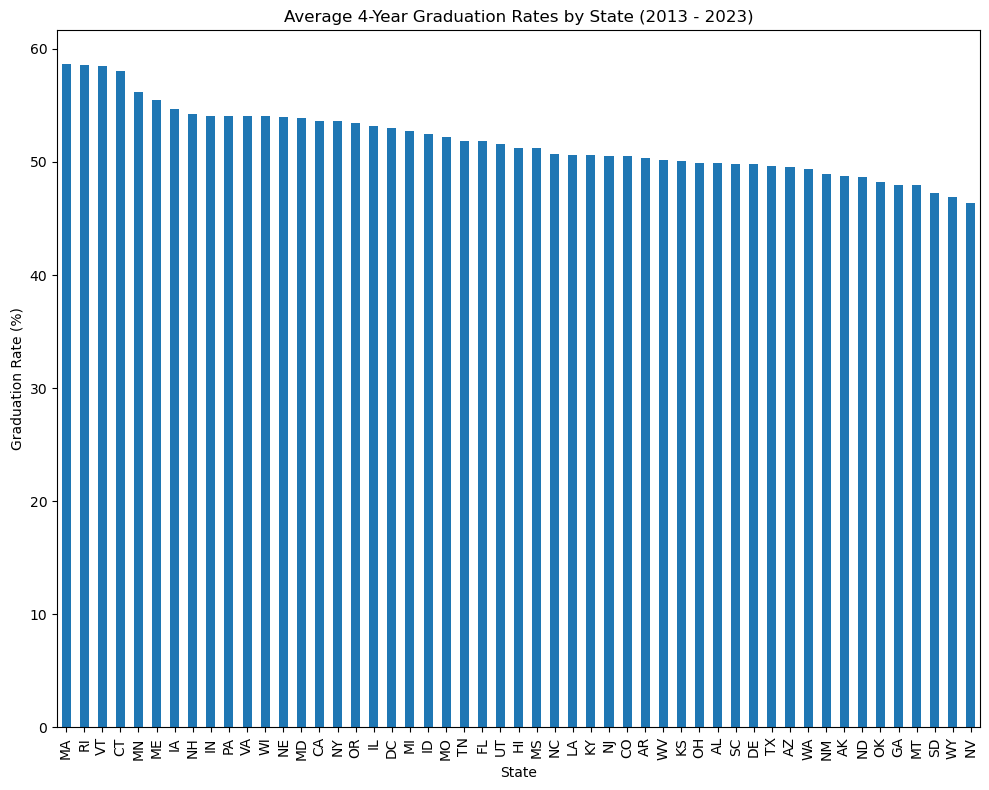

In [5]:
plt.figure(figsize=(10,8))
grad_rates['Grad_Rate_4yr_Percentage'].plot(kind='bar')
plt.title('Average 4-Year Graduation Rates by State (2013 - 2023)')
plt.xlabel('State')
plt.ylabel('Graduation Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

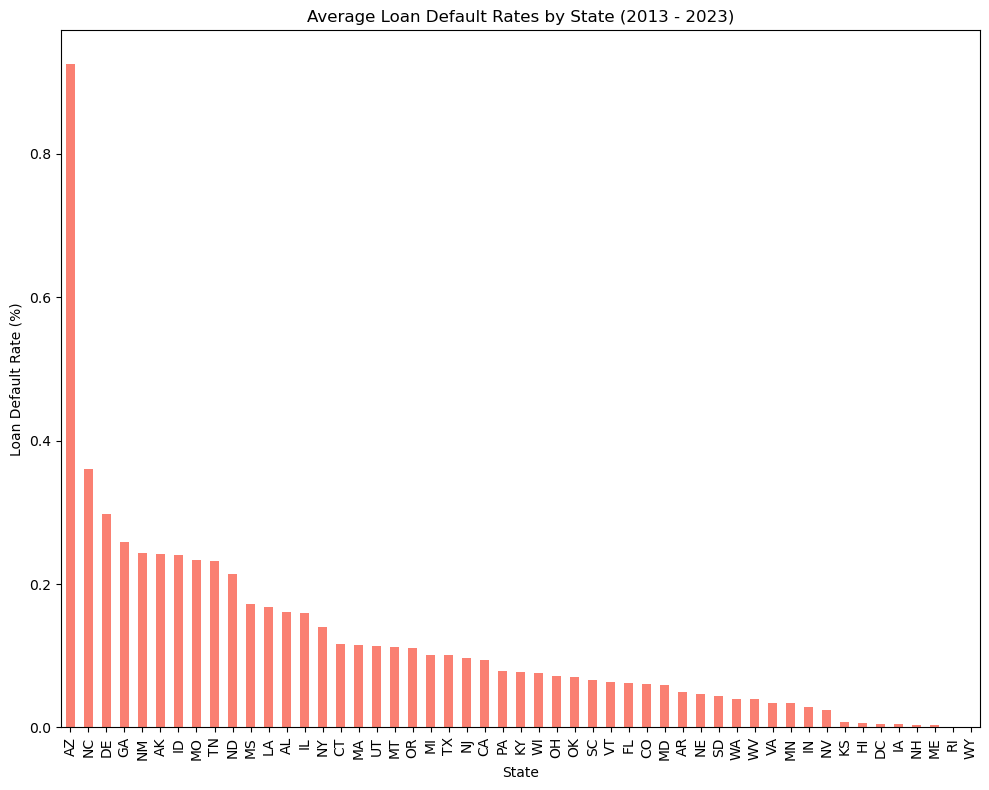

In [6]:
# Sort states by loan default rate
state_rates_sorted_by_default = state_rates.sort_values(by='Loan_Default_Rate_Percentage', ascending=False)

# Plotting the loan default rates
plt.figure(figsize=(10, 8))
loan_rates['Loan_Default_Rate_Percentage'].plot(kind='bar', color='salmon')
plt.title('Average Loan Default Rates by State (2013 - 2023)')
plt.xlabel('State')
plt.ylabel('Loan Default Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

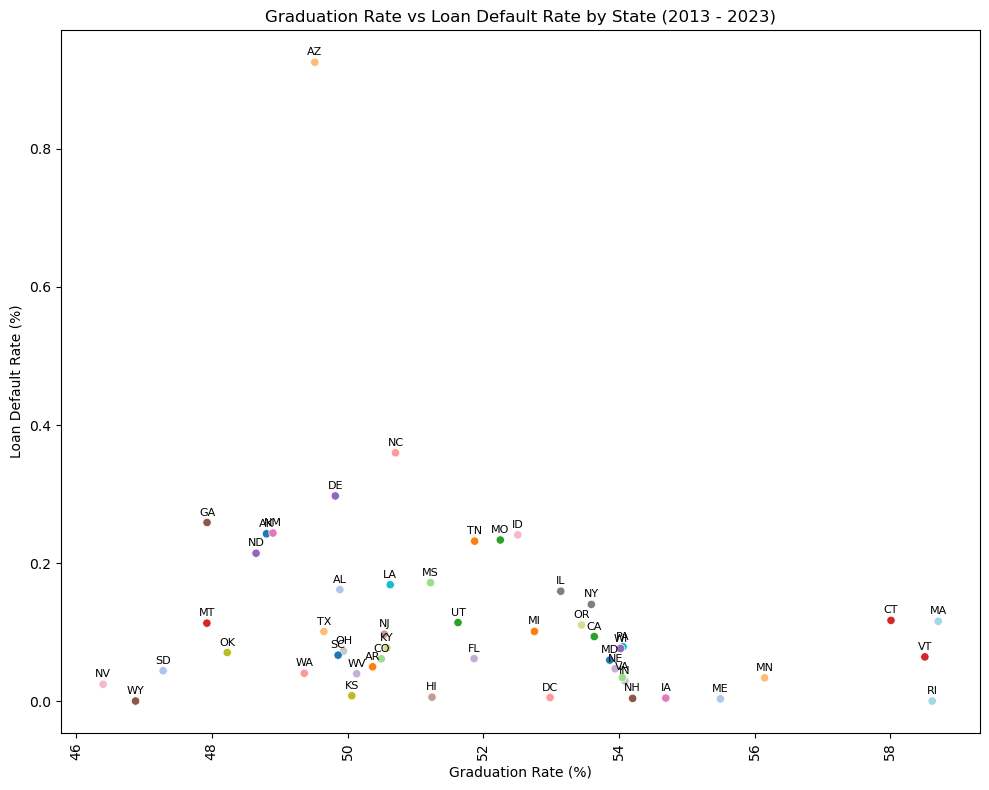

In [7]:
# Scatter plot comparing Graduation Rate vs Loan Default Rate
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Grad_Rate_4yr_Percentage', y='Loan_Default_Rate_Percentage', data=state_rates, hue='State', palette='tab20', legend=None)

# Add labels for each point
for i, row in state_rates.iterrows():
    plt.annotate(row.name,  # Use the index (state abbreviation) as the label
                 (row['Grad_Rate_4yr_Percentage'], row['Loan_Default_Rate_Percentage']),
                 textcoords="offset points",
                 xytext=(0, 5),  # Offset label slightly above the point
                 ha='center', fontsize=8)

# Title and labels
plt.title('Graduation Rate vs Loan Default Rate by State (2013 - 2023)')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Loan Default Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Conclusion
This analysis provides an overview of college graduation and loan default rates across U.S.states from 2013 to 2023 utilizing data from the U.S. Department of Education. It reveals disparities between states like Massachusetts, Rhode Island and Vermont that have the highest average graduation rates, while states like South Dakota, Wyoming, and Nevada report the lowest. Loan default rates also vary significantly, with states like Arizona, North Carolina, and Delaware showing higher default rates compared to Maine, Rhode Island, and Wyoming, which have lower rates.

The visualizations provide a clear depiction of the distribution of graduation and loan default rates distribution across the country. The analysis underscores the importance of understanding state-level educational outcomes and financial challenges. This data can inform policy makers and institutions to aid in improving graduation rates and reducing loan default rates. Future research could investigate the underlying factors contributing to these disparities to develop strategies for improvement.